<a href="https://colab.research.google.com/github/pragneshrana/DeepLearning/blob/master/GettingStarted/PandasTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#Connect colab with drive
1. Run the command 
2. SignIn
3. Enter Varification code and then replace file id as per your choice

In [4]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

Uploaded file with ID 11jsnBLMVz6xiQ0wUoDP0D472Z45WjfSN


In [5]:

# Download a file based on its file ID.
# Titanic Dataset
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '19WYZtvwb7Gtt34eWBBvYxziGUx2YqDfR' #https://drive.google.com/file/d/19WYZtvwb7Gtt34eWBBvYxziGUx2YqDfR/view?usp=sharing
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "Survived,Pclass,Name,Sex,Age,Siblings_Spouses Aboard,Parents_Children Aboard,Fare
0,3,Mr. Owen Harris Braund,male,22,1,0,7.25
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.925
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1
0,3,Mr. William Henry Allen,male,35,0,0,8.05
0,3,Mr. James Moran,male,27,0,0,8.4583
0,1,Mr. Timothy J McCarthy,male,54,0,0,51.8625
0,3,Master. Gosta Leonard Palsson,male,2,3,1,21.075
1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27,0,2,11.1333
1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14,1,0,30.0708
1,3,Miss. Marguerite Rut Sandstrom,female,4,1,1,16.7
1,1,Miss. Elizabeth Bonnell,female,58,0,0,26.55
0,3,Mr. William Henry Saundercock,male,20,0,0,8.05
0,3,Mr. Anders Johan Andersson,male,39,1,5,31.275
0,3,Miss. Hulda Amanda Adolfina Vestrom,female,14,0,0,7.8542
1,2,Mrs. (Mary D Kingcome) Hewlett,female,55,0,0,16
0,3,Master. Eugene Rice,male,2

In [6]:
downloaded.GetContentFile('titanic.csv')

In [7]:
!ls

adc.json  sample_data  titanic.csv


#Pandas

In [8]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [9]:
df.head() #first 5 columns

,Survived,Pclass,Name,Sex,Age,Siblings_Spouses Aboard,Parents_Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [10]:
df.tail() #last 5 columns

,Survived,Pclass,Name,Sex,Age,Siblings_Spouses Aboard,Parents_Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [11]:
#function avilable in pandas
dir(df)

['Age',
 'Fare',
 'Name',
 'Pclass',
 'Sex',
 'Survived',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd

In [12]:
len(df) #length of the data frame

887

In [13]:
df.shape #shape of the dataset

(887, 8)

In [14]:
df_short = df[0:10] #first 10 rows exclusive 10

In [15]:
df_short.shape

(10, 8)

In [16]:
df_thin = df[['Name','Sex','Survived','Age']] #select few columns
print(df_thin)

                                                  Name     Sex  Survived   Age
0                               Mr. Owen Harris Braund    male         0  22.0
1    Mrs. John Bradley (Florence Briggs Thayer) Cum...  female         1  38.0
2                                Miss. Laina Heikkinen  female         1  26.0
3          Mrs. Jacques Heath (Lily May Peel) Futrelle  female         1  35.0
4                              Mr. William Henry Allen    male         0  35.0
..                                                 ...     ...       ...   ...
882                               Rev. Juozas Montvila    male         0  27.0
883                        Miss. Margaret Edith Graham  female         1  19.0
884                     Miss. Catherine Helen Johnston  female         0   7.0
885                               Mr. Karl Howell Behr    male         1  26.0
886                                 Mr. Patrick Dooley    male         0  32.0

[887 rows x 4 columns]


In [17]:
df_survived = df[df['Survived'] == 1] #filterinng by who has survived
df_survived.shape #number people survived


(342, 8)

In [18]:
df_survived.describe() #different details

,Survived,Pclass,Age,Siblings_Spouses Aboard,Parents_Children Aboard,Fare
count,342.0,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.408392,0.473684,0.464912,48.395408
std,0.0,0.863321,14.427863,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.750000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [19]:
df_thin[df_thin['Survived'] == 1]['Age'].mean() #Mean value of age who has survived

28.408391812865496

In [21]:
g = df_thin.groupby(['Survived']) #grpuing by data avialble by unique values in 'Survived' column Here by 0 and 1
print(g)

In [22]:
for first_key, seco_key in g:
  print(first_key)
  print(seco_key)

0
                                    Name     Sex  Survived   Age
0                 Mr. Owen Harris Braund    male         0  22.0
4                Mr. William Henry Allen    male         0  35.0
5                        Mr. James Moran    male         0  27.0
6                 Mr. Timothy J McCarthy    male         0  54.0
7          Master. Gosta Leonard Palsson    male         0   2.0
..                                   ...     ...       ...   ...
880                Mr. Henry Jr Sutehall    male         0  25.0
881  Mrs. William (Margaret Norton) Rice  female         0  39.0
882                 Rev. Juozas Montvila    male         0  27.0
884       Miss. Catherine Helen Johnston  female         0   7.0
886                   Mr. Patrick Dooley    male         0  32.0

[545 rows x 4 columns]
1
                                                  Name     Sex  Survived   Age
1    Mrs. John Bradley (Florence Briggs Thayer) Cum...  female         1  38.0
2                                M

In [24]:
df_thin.groupby(['Survived']).mean() #Grouping by people who survived and its mean value

,Age
Survived,
0,30.138532
1,28.408392


In [25]:
df_thin.groupby(['Survived']).max() #Grouping by people who survived and its max value

,Name,Sex,Age
Survived,,,
0,Rev. Thomas Roussel Davids Byles,male,74.0
1,the Countess. of (Lucy Noel Martha Dyer-Edward...,male,80.0


In [27]:
df_thin.groupby(['Survived']).min() #Grouping by people who survived and its min value

,Name,Sex,Age
Survived,,,
0,Capt. Edward Gifford Crosby,female,1.00
1,Col. Oberst Alfons Simonius-Blumer,female,0.42


# *Plotting*

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


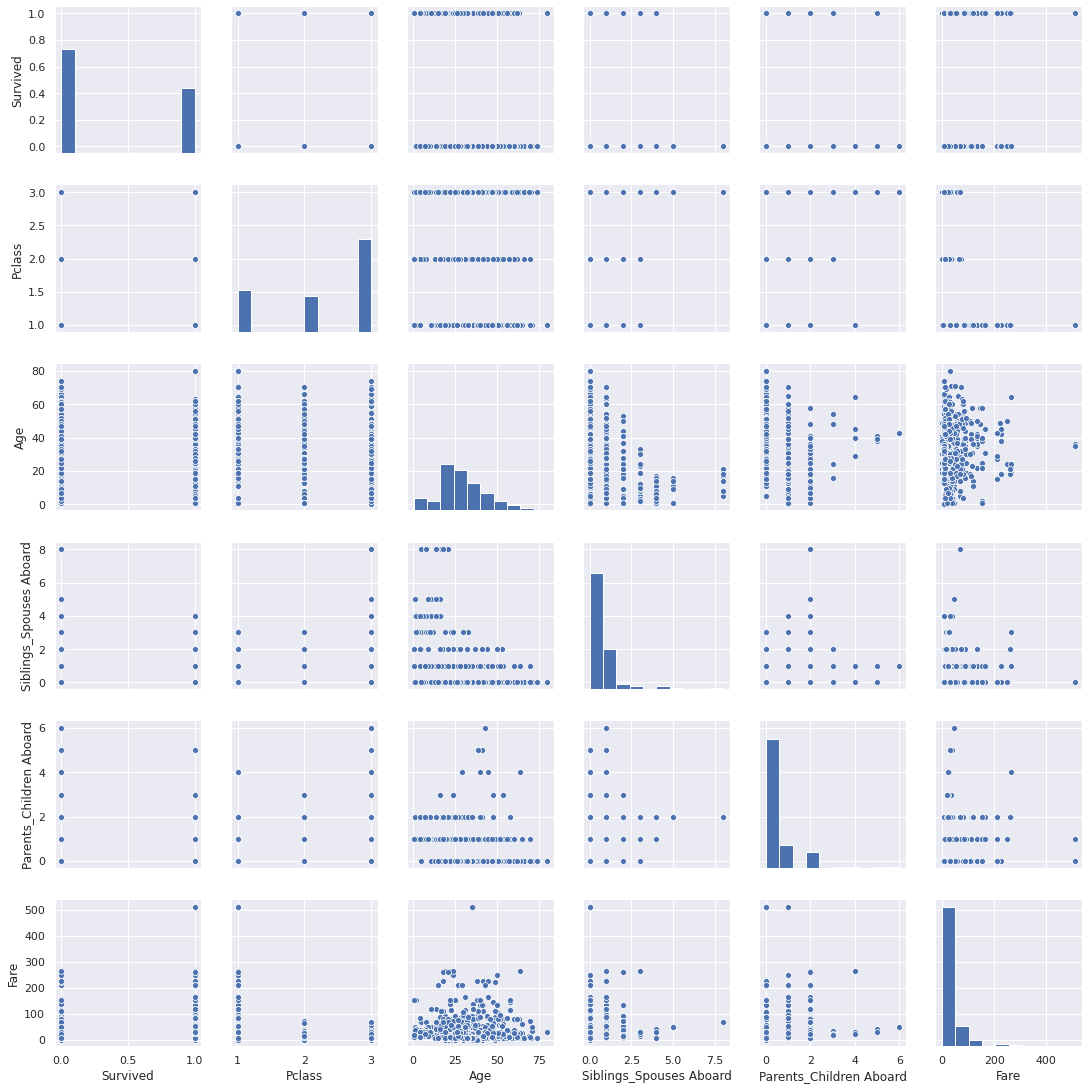

In [31]:
#Generating pair wise plot
ax = sns.pairplot(df,diag_kind='hist')

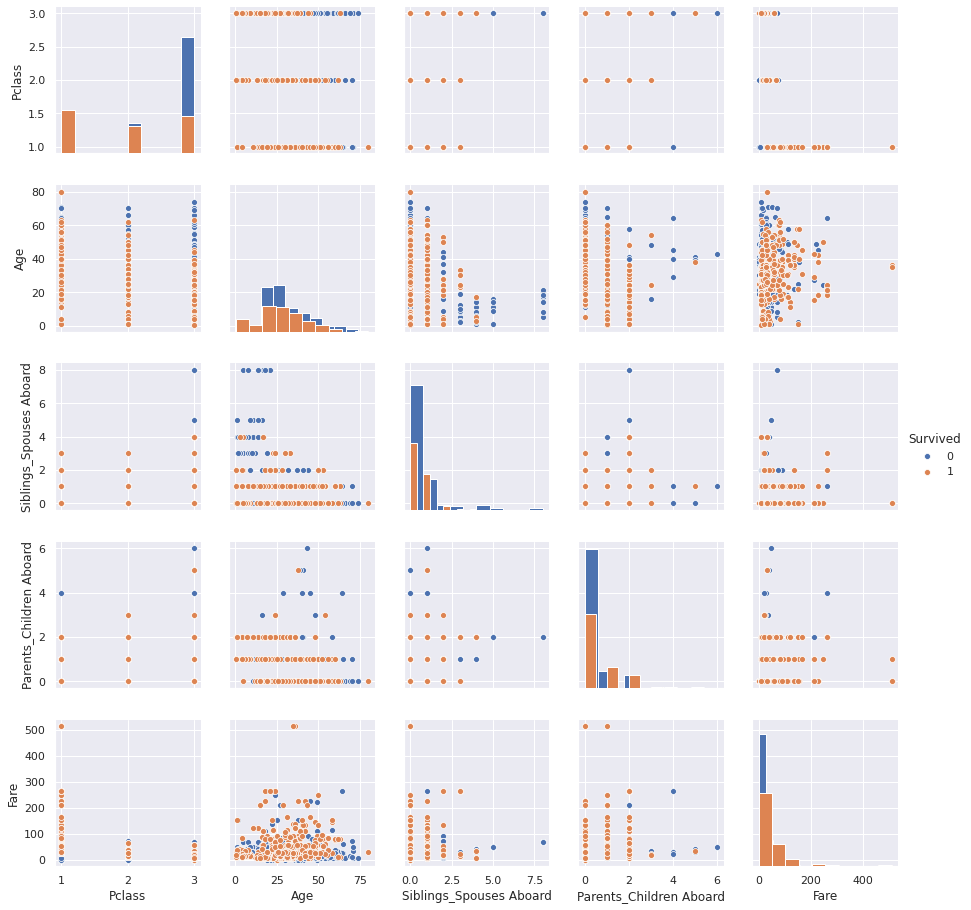

In [32]:
ax = sns.pairplot(df,diag_kind='hist',hue='Survived') #highlighting by the survived